## Keyword extraction/modelling using TF-IDF - similarity of keywords in the title compared to keywords in the content

In [5]:
import sys
sys.path.append('../')  # Add the parent directory to the module search path
from src.loader import load_data
from src.utils import parse_url
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the mini_data from CSV
mini_data_file_path = '../data/mini_data.csv'
mini_data = load_data(mini_data_file_path )


# TF-IDF Vectorization
# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer()

# Replace missing values with empty strings
mini_data['title'].fillna('', inplace=True)
mini_data['content'].fillna('', inplace=True)

# Apply the vectorizer on the headline/title and news body separately
title_tfidf = vectorizer.fit_transform(mini_data['title'])
content_tfidf = vectorizer.transform(mini_data['content'])

# Step 4: Calculate cosine similarity
# Compare the TF-IDF vectors of headline/title and news body
similarity_scores = cosine_similarity(title_tfidf, content_tfidf)

# Print the similarity scores
for i, score in enumerate(similarity_scores):
    print(f"Document {i+1} similarity score: {score[0]}")

Document 1 similarity score: 0.7407877024184343
Document 2 similarity score: 0.0
Document 3 similarity score: 0.7407877024184343
Document 4 similarity score: 0.0
Document 5 similarity score: 0.04852504242187047
Document 6 similarity score: 0.0
Document 7 similarity score: 0.0
Document 8 similarity score: 0.17199666563997495
Document 9 similarity score: 0.08056357492893285
Document 10 similarity score: 0.07105298873838882
Document 11 similarity score: 0.08065517474314322
Document 12 similarity score: 0.17575512027432502
Document 13 similarity score: 0.0
Document 14 similarity score: 0.0
Document 15 similarity score: 0.0
Document 16 similarity score: 0.26777424788281673
Document 17 similarity score: 0.0
Document 18 similarity score: 0.045389896455484094
Document 19 similarity score: 0.030142546638211414
Document 20 similarity score: 0.0
Document 21 similarity score: 0.05137529943380126
Document 22 similarity score: 0.06224275385247769
Document 23 similarity score: 0.0
Document 24 similar

/tmp/ipykernel_5095/3382382608.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mini_data['title'].fillna('', inplace=True)
/tmp/ipykernel_5095/3382382608.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

## Plot - Keyword Similarity Scores

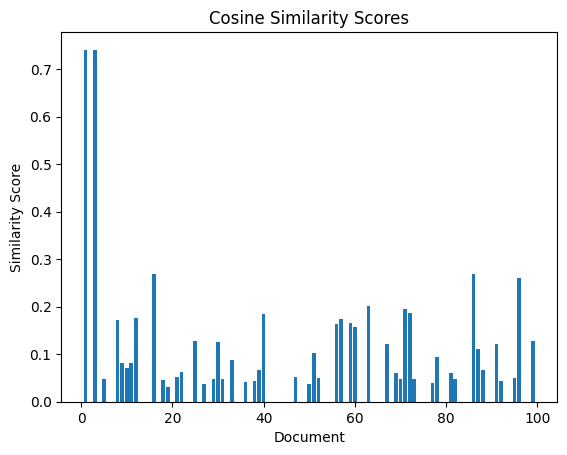

In [7]:
import matplotlib.pyplot as plt

# Plot the similarity scores
x = range(1, len(similarity_scores) + 1)
y = [score[0] for score in similarity_scores]

plt.bar(x, y)
plt.xlabel('Document')
plt.ylabel('Similarity Score')
plt.title('Cosine Similarity Scores')
plt.show()